In [1]:
#when I try to import matplotlib, there was an error, so I just go to the terminal and did "pip3 matplotlib --user" or "conda matplotlib --user"
#for the cv2, I did: pip3 install opencv-python
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [2]:
#I had issue with this line and the error message was: ImportError('Could not import PIL.Image. '
#I then did "conda install Pillow" in the terminal and restart the notebook
img = image.load_img('Training/dog/dog1.jpeg')

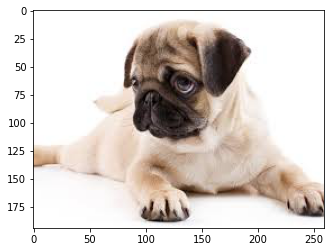

In [3]:
plt.imshow(img)

In [4]:
cv2.imread('Training/dog/dog1.jpeg')

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 253, 253],
        [255, 253, 252],
        [255, 253, 252]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [5]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [6]:
###in your folder, right click on the folder; hold "option" key, and find the "copy validation as pathname"/Users/lchen4/Documents/Research/Sym_Nonsym_Modeling/Validation
train_dataset = train.flow_from_directory('Training/',
                                         target_size=(200,200),
                                         batch_size = 2,
                                         class_mode = 'binary')
validation_dataset = validation.flow_from_directory('Validation/',
                                         target_size=(200,200),
                                         batch_size = 2,
                                         class_mode = 'binary')

Found 14 images belonging to 2 classes.
Found 14 images belonging to 2 classes.


In [7]:
train_dataset.class_indices

{'cat': 0, 'dog': 1}

In [8]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [9]:
## ERROR: name 'tf' is not defined; find out that I made an typo up in line 5: import tensorflow as rf; corrected with tf

model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    ##
                                    tf.keras.layers.Dense(1,activation='sigmoid')
                                    ])

In [10]:
model.compile(loss='binary_crossentropy',
             optimizer = RMSprop(lr=0.001),
             metrics = ['accuracy'])

In [14]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch = 3,
                     epochs = 15,
                     validation_data = validation_dataset)

Epoch 1/15
3/3 [==============================] - 1s 403ms/step - loss: 0.9439 - accuracy: 0.6667 - val_loss: 0.5539 - val_accuracy: 0.7857
Epoch 2/15
3/3 [==============================] - 1s 339ms/step - loss: 0.5574 - accuracy: 1.0000 - val_loss: 0.4661 - val_accuracy: 0.9286
Epoch 3/15
3/3 [==============================] - 1s 319ms/step - loss: 0.8314 - accuracy: 0.6667 - val_loss: 0.5015 - val_accuracy: 1.0000
Epoch 4/15
3/3 [==============================] - 1s 323ms/step - loss: 0.4993 - accuracy: 1.0000 - val_loss: 0.4682 - val_accuracy: 0.7857
Epoch 5/15
3/3 [==============================] - 1s 321ms/step - loss: 0.7923 - accuracy: 0.8333 - val_loss: 0.3911 - val_accuracy: 1.0000
Epoch 6/15
3/3 [==============================] - 1s 332ms/step - loss: 0.4586 - accuracy: 0.8333 - val_loss: 0.2830 - val_accuracy: 1.0000
Epoch 7/15
3/3 [==============================] - 1s 342ms/step - loss: 0.3348 - accuracy: 1.0000 - val_loss: 3.2078 - val_accuracy: 0.5000
Epoch 8/15
3/3 [====

In [12]:
validation_dataset.class_indices

{'cat': 0, 'dog': 1}

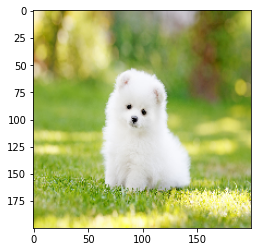

It is a dog


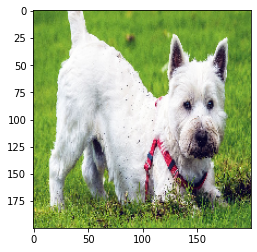

It is a dog


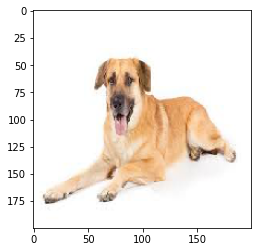

It is a dog


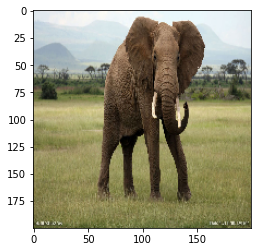

It is a dog


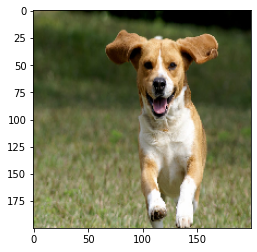

It is a dog


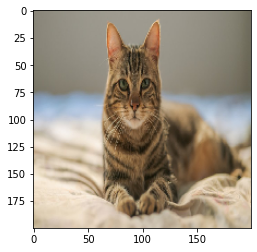

It is a dog


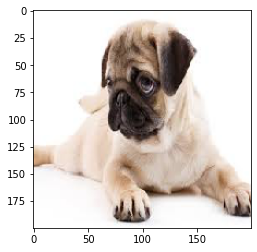

It is a dog


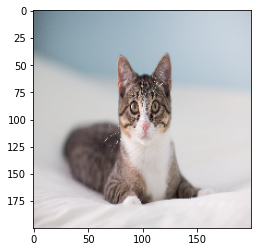

It is a dog


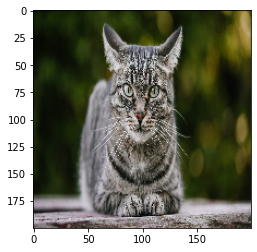

It is a dog


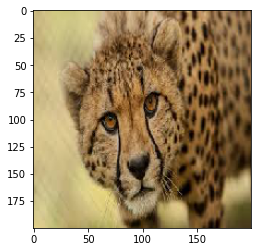

It is a dog


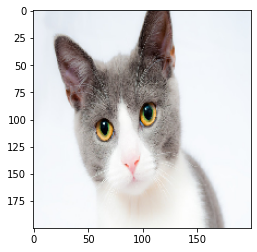

It is a dog


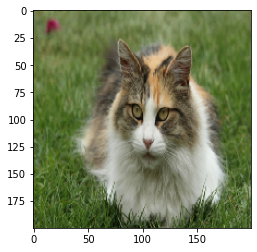

It is a dog


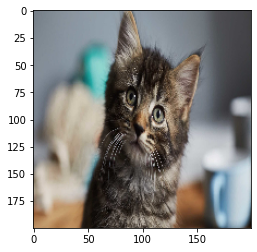

It is a dog


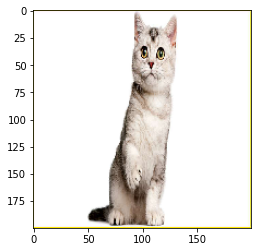

It is a dog


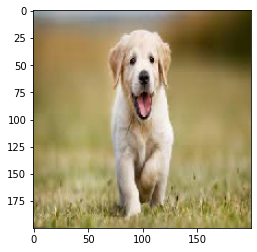

It is a dog


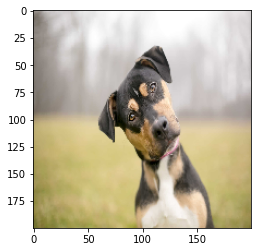

It is a dog


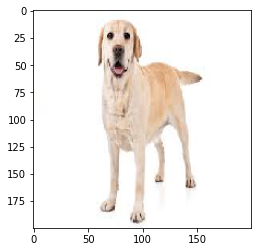

It is a dog


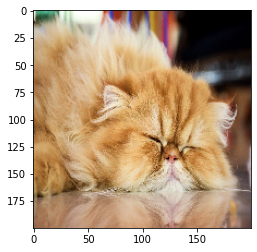

It is a dog


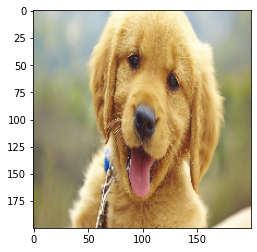

It is a dog


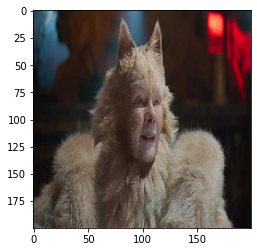

It is a dog


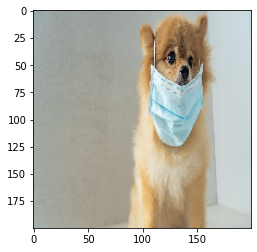

It is a dog


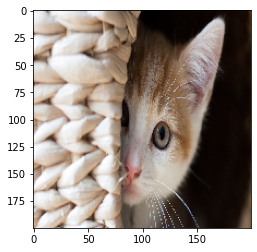

It is a dog


In [13]:
##ERROR message: UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7f95788c5e00>
##run "os.listdir(dir_path)", and found that the output is "['.DS_Store',
# '8.jpg',
# '1.jpeg',
# '7.jpeg',
# '5.jpeg',
# '4.jpg',
# '6.jpg',
# '2.jpg',
# '3.jpg']"
##Basically, the first file in the list is not a pic;

def listdir_nohidden(path):
    for f in os.listdir(path):
        if not f.startswith('.'):
            yield f

dir_path = 'Testing'
for i in listdir_nohidden(dir_path):
    img = image.load_img(dir_path+'//'+i,target_size = (200,200))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X, axis = 0)
    images = np.vstack([X])
    val = model.predict(images)
    if val == 0:
       print("It is a cat")
    else:
       print("It is a dog")    
    
    
    